<a href="https://colab.research.google.com/github/avinash-tiwary/MCMC/blob/main/Edington_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Libraries

In [ ]:
# All required libraries are imported here
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data Import

In [ ]:
#Data is imported and stored here
df = pd.read_table('https://raw.githubusercontent.com/avinash-tiwary/MCMC/main/eddington.dat'
                   ,skiprows=[0],delim_whitespace=True)

'''Correcting value of Dx and Dy by subtracting -1.500 in Dx and -1.324 in Dy
(Refer to The Eclipse of 1919: MCMC and HMC exercise ICIC Data Analysis Workshop September 2018)
by Alan Heavens Sept 2018'''
df['Dx_obs_corrected'], df['Dy_obs_corrected'] = (df.Dx_obs_uncorrected + 1.500), (df.Dy_obs_uncorrected + 1.324)

# Extracting out data from pandas DataFrame
x,y,Ex,Ey,Dx,Dy = df.x, df.y, df.Ex, df.Ey, df.Dx_obs_corrected,df.Dy_obs_corrected

# storing all the data in single array for clean experience
data = np.array([x,y,Ex,Ey,Dx,Dy])

### Log of Likelihood Calculating Function

In [ ]:
# Log of likelihood is defined here
def log_Likelihood(theta,data=data,sigmad = [0.05,0.05]):
  Dx_model = theta[1]*data[0] + theta[2]*data[1] + theta[3] + theta[0]*data[2]
  Dy_model = theta[4]*data[0] + theta[5]*data[1] + theta[6] + theta[0]*data[3]
 
  Diff_x= data[4] - Dx_model
  Diff_y= data[5] - Dy_model

  lg_lkh = (-1/(2*sigmad[0]**2) * np.dot(Diff_x , Diff_x))+(-1/(2*sigmad[1]**2) * np.dot(Diff_y , Diff_y))
  return lg_lkh

### Metropolis-Hastings sampler

In [ ]:
def MH_sampler(M,N,theta_in,sigma):
    alpha_accepted = []
    a_accepted     = []
    b_accepted     = []
    c_accepted     = []
    d_accepted     = []
    e_accepted     = []
    f_accepted     = []
    acceptance_likelihood = []
    Naccepted = []

    for i in range(M):
        Naccept = 0
        alpha_accept = [theta_in[0][i]]
        a_accept     = [theta_in[1][i]]
        b_accept     = [theta_in[2][i]]
        c_accept     = [theta_in[3][i]]
        d_accept     = [theta_in[4][i]]
        e_accept     = [theta_in[5][i]]
        f_accept     = [theta_in[6][i]]
        acpt_lkhd    = []
        # theta_accept = np.array([alpha_accept, a_accept, b_accept, c_accept, d_accept, e_accept, f_accept])
        for j in range(N):  
            theta_accept = np.array([alpha_accept[-1], a_accept[-1], b_accept[-1], c_accept[-1], d_accept[-1], e_accept[-1], f_accept[-1]])
            #Generating random values of h and Omega_m in range (0,1) with Gaussian proposal distribution
            alpha_random = np.random.normal(alpha_accept[-1], sigma[0]) 
            a_random     = np.random.normal(a_accept[-1], sigma[1])     
            b_random     = np.random.normal(b_accept[-1], sigma[2])     
            c_random     = np.random.normal(c_accept[-1], sigma[3])     
            d_random     = np.random.normal(d_accept[-1], sigma[4])     
            e_random     = np.random.normal(e_accept[-1], sigma[5])     
            f_random     = np.random.normal(f_accept[-1], sigma[6])  
            theta_random = [alpha_random, a_random, b_random, c_random, d_random, e_random, f_random]   

            #Calulating log of likelihood of these randomly generated 
            new_log_L = log_Likelihood(theta_random, data)

            '''
            calulating acceptance probability and taking minimum of 1 and ratio of likelihood of new value of parameters to
            previous accepted values. If the ratio of likelihood is increased then it is accepted without condition.
            But if the likelihood goes down in next step then it would be accepted with uniform probability.
            '''

            acc_lkh = min(np.exp(new_log_L - log_Likelihood(theta_accept, data)), 1)

            if np.random.uniform(0, 1) < acc_lkh:
                alpha_accept   = np.append(alpha_accept, alpha_random)
                a_accept       = np.append(a_accept, a_random)
                b_accept       = np.append(b_accept, b_random)
                c_accept       = np.append(c_accept, c_random)
                d_accept       = np.append(d_accept, d_random)
                e_accept       = np.append(e_accept, e_random)
                f_accept       = np.append(f_accept, f_random)
                acpt_lkhd           = np.append(acpt_lkhd, new_log_L)
                Naccept+=1

        alpha_accepted.append(alpha_accept)
        a_accepted.append(a_accept)
        b_accepted.append(b_accept)
        c_accepted.append(c_accept)
        d_accepted.append(d_accept)
        e_accepted.append(e_accept)
        f_accepted.append(f_accept)
        acceptance_likelihood.append(acpt_lkhd)
        Naccepted.append(Naccept)
        theta_accepted = np.array([alpha_accepted, a_accepted, b_accepted, c_accepted, d_accepted, e_accepted, f_accepted])
    return theta_accepted, acceptance_likelihood, Naccepted

In [ ]:
#Running M chains with N samples each
M = 5
N = 100000
Nburn = 250
sigma = [0.015, 0.015, 0.015, 0.015,0.015, 0.015, 0.015]
theta_in = np.array([[0.0, 0.35, 0.60, 0.75, 0.99],
                    [0.0, 0.35, 0.60, 0.75, 0.99],
                    [0.0, 0.35, 0.60, 0.75, 0.99],
                    [0.0, 0.35, 0.60, 0.75, 0.99],
                    [0.0, 0.35, 0.60, 0.75, 0.99],
                    [0.0, 0.35, 0.60, 0.75, 0.99],
                    [0.0, 0.35, 0.60, 0.75, 0.99]])
theta_accepted, acceptance_likelihood, Naccepted = MH_sampler(M,N,theta_in, sigma)

### Plots and Observations

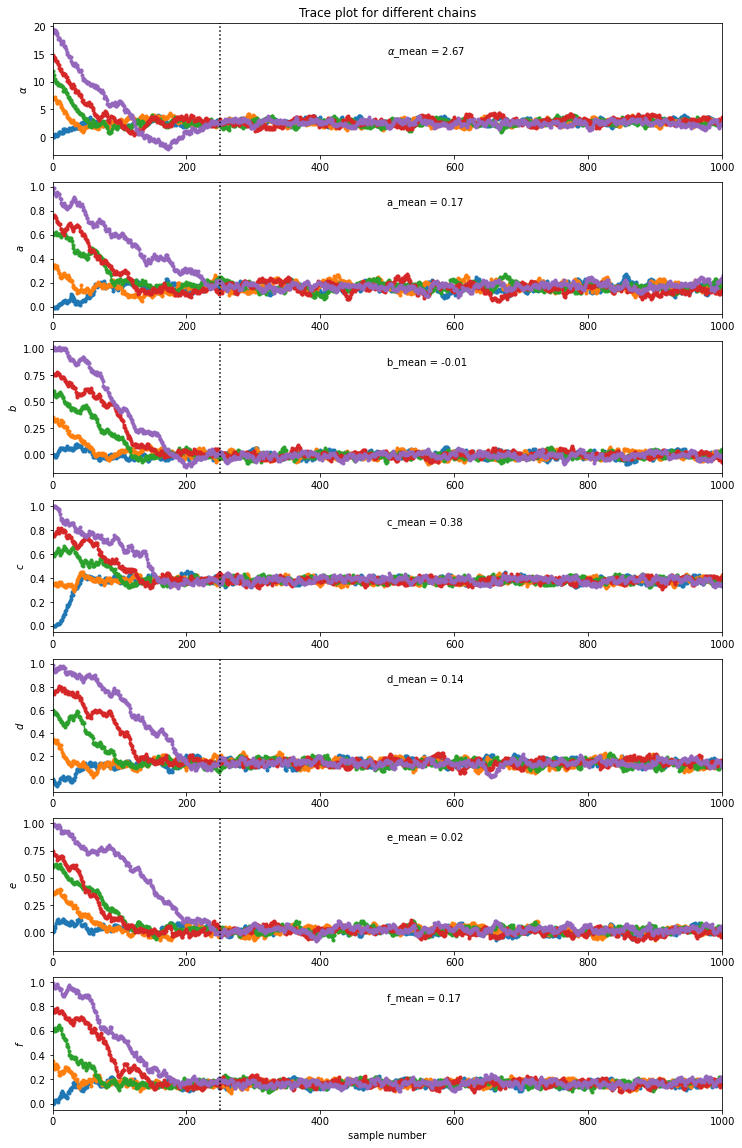

In [ ]:
#combining all the chains to create larger sample (To save computation time as I already have 5 chains)
alpha_all = []
a_all     = []
b_all     = []
c_all     = []
d_all     = []
e_all     = []
f_all     = []
acc_all   = []
for i in range(M):
    alpha_all = np.append(theta_accepted[0][i][Nburn+1:], alpha_all)
    a_all = np.append(theta_accepted[1][i][Nburn+1:], a_all)
    b_all = np.append(theta_accepted[2][i][Nburn+1:], b_all)
    c_all = np.append(theta_accepted[3][i][Nburn+1:], c_all)
    d_all = np.append(theta_accepted[4][i][Nburn+1:], d_all)
    e_all = np.append(theta_accepted[5][i][Nburn+1:], e_all)
    f_all = np.append(theta_accepted[6][i][Nburn+1:], f_all)
    acc_all = np.append(acceptance_likelihood[i][Nburn:], acc_all)


# Plotting Trace plot for Omega_m and h for all the cains
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(7,1,figsize=(12,20))
ax0.set_xlim(0,1000)
ax0.set_ylabel(r"$\alpha$")
for i in range(M):
    ax0.plot(np.arange(1, Naccepted[i]+2, 1), theta_accepted[0][i]*19.8,marker='.')
ax0.axvline(Nburn, color='black', linestyle=':')
ax0.text(500, 15, r'$\alpha$_mean = {}'.format(np.round(np.mean(alpha_all)*19.8,2)))
ax0.set_title("Trace plot for different chains")

ax1.set_ylabel("$a$")
for i in range(M):
    ax1.plot(np.arange(1, Naccepted[i]+2, 1), theta_accepted[1][i],marker='.')
ax1.axvline(Nburn, color='black', linestyle=':')
ax1.text(500, 0.85, r'a_mean = {}'.format(np.round(np.mean(a_all),2)))
ax1.set_xlim(0,1000)

ax2.set_ylabel("$b$")
for i in range(M):
    ax2.plot(np.arange(1, Naccepted[i]+2, 1), theta_accepted[2][i],marker='.')
ax2.axvline(Nburn, color='black', linestyle=':')
ax2.text(500, 0.85, r'b_mean = {}'.format(np.round(np.mean(b_all),2)))
ax2.set_xlim(0,1000)

ax3.set_ylabel("$c$")
for i in range(M):
    ax3.plot(np.arange(1, Naccepted[i]+2, 1), theta_accepted[3][i],marker='.')
ax3.axvline(Nburn, color='black', linestyle=':')
ax3.text(500, 0.85, r'c_mean = {}'.format(np.round(np.mean(c_all),2)))
ax3.set_xlim(0,1000)

ax4.set_ylabel("$d$")
for i in range(M):
    ax4.plot(np.arange(1, Naccepted[i]+2, 1), theta_accepted[4][i],marker='.')
ax4.axvline(Nburn, color='black', linestyle=':')
ax4.text(500, 0.85, r'd_mean = {}'.format(np.round(np.mean(d_all),2)))
ax4.set_xlim(0,1000)

ax5.set_ylabel("$e$")
for i in range(M):
    ax5.plot(np.arange(1, Naccepted[i]+2, 1), theta_accepted[5][i],marker='.')
ax5.axvline(Nburn, color='black', linestyle=':')
ax5.text(500, 0.85, r'e_mean = {}'.format(np.round(np.mean(e_all),2)))
ax5.set_xlim(0,1000)

ax6.set_ylabel("$f$")
ax6.set_xlabel("sample number")
for i in range(M):
    ax6.plot(np.arange(1, Naccepted[i]+2, 1), theta_accepted[6][i],marker='.')
ax6.axvline(Nburn, color='black', linestyle=':')
ax6.text(500, 0.85, r'f_mean = {}'.format(np.round(np.mean(f_all),2)))
ax6.set_xlim(0,1000)
plt.show()